# Learning XGBoost

In [29]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from pandas import read_csv
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

feature selection using **xgboost**

In [30]:
df = read_csv("pima-indians-diabetes.csv", header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
X, y = df.drop(8, axis = 1), df[8]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

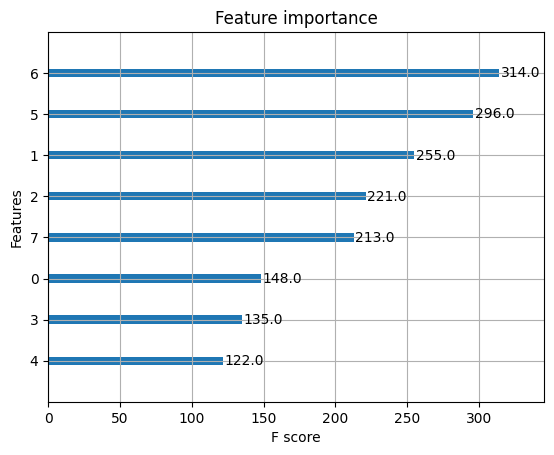

In [32]:

model = XGBClassifier()
model.fit(X, y)
plot_importance(model)

In [33]:
import numpy as np
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self): return None
model = MyXGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.33)
model.fit(X_train, y_train) 
y_predictions = model.predict(X_test)
predictions = [round(val) for val in y_predictions]
accuracy = accuracy_score(y_test, predictions)
print(f"Original Accuracy of the model: {accuracy}")
threshold = np.sort(model.feature_importances_)
for thres in threshold:
    selection = SelectFromModel(model, threshold = thres, prefit = True)
    X_train_selected, X_test_selected = selection.transform(X_train), selection.transform(X_test)
    model_select = MyXGBClassifier()
    model_select.fit(X_train_selected, y_train)
    y_prediction = model_select.predict(X_test_selected)
    prediction = [round(val) for val in y_prediction]
    print(f"{thres}: Prediction Accuracy = {accuracy_score(y_test, prediction)}")

Original Accuracy of the model: 0.7362204724409449


g:\Nitin-Programming-Btech\ML\nitin\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The MyXGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'